# INTRODUCTION TO NLP

1. Bag of words.
2. Count Vectorizer.
3. Tokenization.
4. Stopwords.
5. Stemming and Lemmatization.
6. Vector Similarity
7. TF-IDF

In [1]:
# Standard imports
import numpy as np
from pprint import pprint
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Any
import warnings

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure warnings and pther settings
warnings.filterwarnings("ignore")
sns.set()


def load_data(*, filename: str) -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.

    Returns:
        df (pd.DataFrame): The loaded dataframe.
    """
    df = pd.read_csv(filename)
    print(f"Shape of df: {df.shape}\n")
    return df

### Implement Count Vectorizer

In [3]:
# Load data
bbc_data = load_data(filename="../../data/bbc_text_cls.csv")

bbc_data.head()

Shape of df: (2225, 2)



,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet bus...",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of th...",business
2,"Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.\n\nState-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft's purchase of Yugansk would include such obligations. ""The pledged assets are wit...",business
3,"High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pre-tax profit of £75m ($141m) compared with £125m a year earlier. Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by £106m or 47.3%. BA's profits were still better than market expectation of £59m, and it expects a rise in full-year revenues.\n\nTo help offset the increased price of aviation fuel, BA last year introduced a fuel surchar...",business
4,"Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in the Wall Street Journal and the Financial Times suggested that the French spirits firm is considering a bid, but has yet to contact its target. Allied Domecq shares in London rose 4% by 1200 GMT, while Pernod shares in Paris slipped 1.2%. Pernod said it was seeking acquisitions but refused to comment on specifics.\n\nPernod's last major purchase was a third of US giant Seagram in 2000, the move whic...",business


In [4]:
def count_vectorizer(*, text=list[str]) -> dict:
    """This is used to return the count of words in a list.

    Params:
        text (list[str]): List of text.

    Returns:
        count_dict (dict): A dict containing the counts of the unique words.
    """
    from collections import Counter

    # Select the text at index 0. Convert to a list of words.
    count_dict = Counter(text)
    return count_dict

In [5]:
# Simple tokenizer
text = bbc_data["text"].iat[10].split()
text[:5]

['Ask', 'Jeeves', 'tips', 'online', 'ad']

In [6]:
# Count the occurrences of the words in the list
my_list = [
    "hello",
    "sad",
    "firm",
    "hello",
    "the",
    "become",
    "happy",
    "tips",
    "firm",
    "the",
    "become",
]
count_vectorizer(text=my_list)

Counter({'hello': 2,
         'sad': 1,
         'firm': 2,
         'the': 2,
         'become': 2,
         'happy': 1,
         'tips': 1})

## Tokenization

During processing, `spaCy` first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language.

In [7]:
# Tokenize
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

text = "Good morning. Welcome to another great day."
doc = nlp(text)


for token in doc:
    print(token.text)

Good
morning
.
Welcome
to
another
great
day
.


In [8]:
# Check for missing values
bbc_data.isna().sum()

text      0
labels    0
dtype: int64

#### Split The Data Into Training and Validation Data.

In [9]:
# Target
TARGET = "labels"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = bbc_data["text"]
y = bbc_data[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((2002,), (223,))

### Stopwords

1. They are ineffective for NLP tasks because they appear in every document and make classification difficult. e.g when building a spam classifier.
2. Stopword removal can potentially help in improving performance, as there are fewer and only significant tokens left. Thus, the classification accuracy could be improved.

### Note

Because stopwords can be application/domain specific, we must exercise caution when removing them.

In [10]:
# Load stopowrds (using spaCy)
# stopwords = nlp.Defaults.stop_words

In [11]:
bbc_data[TARGET].value_counts(normalize=True)

sport            0.229663
business         0.229213
politics         0.187416
tech             0.180225
entertainment    0.173483
Name: labels, dtype: float64

### Comment:

1. Check the distribution of the target. This is done inorder to determine whether the labels are `imbalanced` or not.
2. If the labels are imbalanced, e.g if a class has ~**98%** of the labels, it means that a model accuracy of 98% is NOT useful and another metric like roc_auc score should be used.

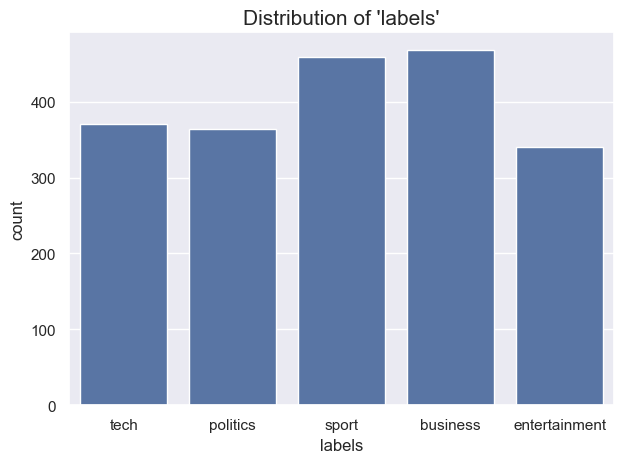

In [12]:
df = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target. It is fairly balanced.
sns.countplot(x=TARGET, data=df, color="b")
plt.title(f"Distribution of {TARGET!r}", size=15)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = CountVectorizer()
# Count the words( vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr  # Sparse matric is used because most of the values in the vector are 0s

<2002x28253 sparse matrix of type '<class 'numpy.int64'>'
	with 405239 stored elements in Compressed Sparse Row format>

In [14]:
(X_tr != 0).sum()  # Sum of values that is NOT one.

non_zeros = (X_tr != 0).sum()
total_count = np.prod(X_tr.toarray().shape)

# Percentage of non-zero values
non_zeros / total_count

0.0071644456488543845

#### Multi-Nomial Naive Bayes

> The `multinomial Naive Bayes` classifier is suitable for classification with **`discrete`** features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [15]:
nb_model = MultinomialNB()

nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Train accuracy: 0.993
Test accuracy: 0.955


#### Train A New Model

* Remove Stopwords

In [16]:
# Train a new model by removing the stop words
vectorizer = CountVectorizer(stop_words="english")

# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 27959)
Train accuracy: 0.994
Test accuracy: 0.955


In [17]:
text = X_train.iat[5]
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_)
    break

IAAF IAAF


In [18]:
class LemmaTokenizer:
    """This is used to tokenize and lemmatize
    (i.e convert to its root form )a text."""

    def __init__(self) -> None:
        self.nlp = nlp

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        doc = self.nlp(text)  # Tokenize the text
        lemmatized_doc = [token.lemma_ for token in doc]
        return lemmatized_doc


class Tokenizer:
    """This is used to tokenize i.e break text
    into individual linguistic units a text."""

    def __init__(self) -> None:
        self.nlp = nlp

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        doc = self.nlp(text)  # Tokenize the text
        tokenized_doc = [token.text for token in doc]
        return tokenized_doc

In [19]:
print(text)

IAAF awaits Greek pair's response

Kostas Kenteris and Katerina Thanou are yet to respond to doping charges from the International Association of Athletics Federations (IAAF).

The Greek pair were charged after missing a series of routine drugs tests in Tel Aviv, Chicago and Athens. They have until midnight on 16 December and an IAAF spokesman said: "We're sure their responses are on their way." If they do not respond or their explanations are rejected, they will be provisionally banned from competition. They will then face a hearing in front of the Greek Federation, which will ultimately determine their fate. Their former coach Christos Tzekos has also been charged with distributing banned substances. Under IAAF rules, the athletes could receive a maximum one-year suspension. Kenteris and Thanou already face a criminal trial after being charged with avoiding a drug test on the eve of the Athens Olympics and then faking a motorcyle crash.

No date for the trial has yet been set and aga

In [20]:
l = LemmaTokenizer()
l(text=text)[20:22]

['the', 'International']

#### Train Another Model

* Using the Lemmatizer (convert the words to their root forms).

In [21]:
# Train a new model with lemmatization. (It takes a while to train)
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 23923)
Train accuracy: 0.992
Test accuracy: 0.960


#### Train Another Model

* Using the custom Tokenizer (convert the texts to its linguistic units).

In [22]:
# Train a new model with using tokenized documents. (Using spaCy)
# It takes a while to train
vectorizer = CountVectorizer(tokenizer=Tokenizer())

# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 29363)
Train accuracy: 0.993
Test accuracy: 0.964


In [23]:
class SimpleTokenizer:
    """This is used to tokenize a text."""

    def __init__(self) -> None:
        pass

    def __call__(self, text: str, *args: Any, **kwargs: Any) -> Any:
        tokenized_doc = text.split(" ")  # Tokenize the text
        return tokenized_doc

#### Train Another Model

* Using the simple Tokenizer (convert the texts to its linguistic units).

In [24]:
# Train a new model with using tokenized documents.
vectorizer = CountVectorizer(tokenizer=SimpleTokenizer())

# Count the words (vector of numbers!)
X_tr = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)
print(f"Shape X_train: {X_tr.shape}")

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_tr, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Shape X_train: (2002, 63730)
Train accuracy: 0.997
Test accuracy: 0.955
